In [1]:
# Import Dependencies
import csv
import pandas as pd
import random
import numpy as np
import string
from faker import Faker
fake = Faker()
import os
import matplotlib.pyplot as plt


In [2]:
# Import The Two CSV Files
citydata_df = pd.read_csv("raw_data/city_data.csv")
ridedata_df= pd.read_csv("raw_data/ride_data.csv")
#citydata_df.head()
#ridedata_df.head()
#print((citydata_df))
#print(len(ridedata_df))

In [3]:
# Merge The Two Dataframes
merged_data=pd.merge(citydata_df, ridedata_df, on='city', how='inner')
#print(len(merged_data))
merged_data.sort_values(by='city')
(merged_data).head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [4]:
#Select X And Y Axis From The Merged Data
merged_groupby_data=(merged_data.groupby(['city','type']))
x_axis=merged_groupby_data['city'].count()
#x_axis
y_axis=merged_groupby_data['fare'].mean()
#y_axis
driver_count1=citydata_df.groupby('city')
driver_count=driver_count1['driver_count'].sum()
driver_count.head()

#Select The Colors Based on the City Types
coloring= merged_data
z_axis=pd.DataFrame(coloring)
color_1=['Gold','LightSkyBlue','LightCoral']
typer=['Suburban','Rural','Urban']
color4_df=pd.DataFrame({ 'color_1': ['Gold','LightSkyBlue','LightCoral'],
                        'type': [ 'Rural','Suburban','Urban'],
                        't':['a','b','c']})

color4_df=color4_df.rename(columns={'type':'type', 'color_1':'colors'})
color4_df

,colors,t,type
0,Gold,a,Rural
1,LightSkyBlue,b,Suburban
2,LightCoral,c,Urban


In [5]:
# pdf=pd.DataFrame(z_axis)
# pdf
# pdf=pdf.rename(columns={'type':'type', 'city':'city'})
# testing=pd.merge(pdf,color4_df, on='type',how='left')
# testing
# zaxis= testing[['colors','type','city']].drop_duplicates().sort_values(by='city')

In [6]:
merged_groupby_data=(merged_data.groupby(['city','type']))
merged_groupby_1=(merged_groupby_data)['type'].count()
merged_groupby_1=pd.DataFrame(merged_groupby_1)
merged_groupby_1['type']

rural=merged_data.loc[merged_data['type']=='Rural']
rural_avgfare=rural.groupby('city')
rural_avgfare=rural_avgfare['fare'].mean()
rural_totalrideas=rural.groupby('city')
rural_totalrideas=rural_totalrideas['city'].count()
rural_drivercount=rural.groupby('city')
rural_drivercount=rural_drivercount['driver_count'].mean()

urban=merged_data.loc[merged_data['type']=='Urban']
urban_avgfare=urban.groupby('city')
urban_avgfare=urban_avgfare['fare'].mean()
urban_totalrideas=urban.groupby('city')
urban_totalrideas=urban_totalrideas['city'].count()
urban_drivercount=urban.groupby('city')
urban_drivercount=urban_drivercount['driver_count'].mean()

suburban=merged_data.loc[merged_data['type']=='Suburban']
suburban_avgfare=suburban.groupby('city')
suburban_avgfare=suburban_avgfare['fare'].mean()
suburban_totalrideas=suburban.groupby('city')
suburban_totalrideas=suburban_totalrideas['city'].count()
suburban_drivercount=suburban.groupby('city')
suburban_drivercount=suburban_drivercount['driver_count'].mean()

In [7]:
! pwd

/Users/bhavaniyella/Documents/GitHub/DATA_CHALLENGE/Pyber


Text(0.5,0,'Total Number of Rides (per City)')

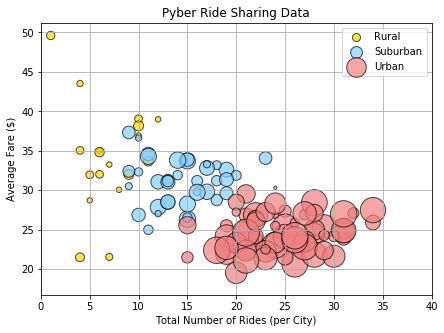

In [8]:
plt.figure(figsize=(7, 5))
myplot=plt.scatter(rural_totalrideas,rural_avgfare,s=rural_drivercount*10, c='gold', alpha=0.70,edgecolors="black")
myplot=plt.scatter(suburban_totalrideas,suburban_avgfare,s=suburban_drivercount*10, c='LightSkyBlue', alpha=0.70,edgecolors="black")
myplot=plt.scatter(urban_totalrideas,urban_avgfare,s=urban_drivercount*10, c='LightCoral', alpha=0.70,edgecolors="black")

plt.grid(True,linestyle='-',color='.67')
plt.xlim(0,40)
plt.legend(color4_df['type'],numpoints=.2, loc='upper right')
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per City)")


In [9]:
# plt.figure(figsize=(7, 5))
# myplot=plt.scatter(x_axis, y_axis,s=driver_count*10, c=zaxis['colors'], alpha=0.70,edgecolors="black")
# plt.grid(True,linestyle='-',color='.67')
# plt.xlim(0,40)
# plt.legend(color4_df['type'],numpoints=.2, loc='upper right')
# #plt.legend(,numpoints=.2, loc='upper right')
# plt.title("Pyber Ride Sharing Data")
# plt.ylabel("Average Fare ($)")
# plt.xlabel("Total Number of Rides (per City)")

(-1.25, 1.25, -1.25, 1.25)

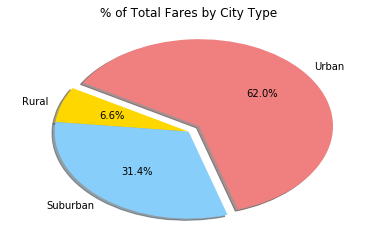

In [10]:
#Total Fares by City Type

merged_groupby_data=(merged_data.groupby(['type']))
x_axis=merged_groupby_data['fare'].sum()
explode = (0,0,0.1 )
colors = ["Gold", "LightSkyBlue", 'LightCoral']
x_axis.plot(kind='pie',autopct="%1.1f%%", shadow=True, explode=explode,colors=colors, startangle=150)
plt.title("% of Total Fares by City Type")
plt.axis("off")

(-1.25, 1.25, -1.25, 1.25)

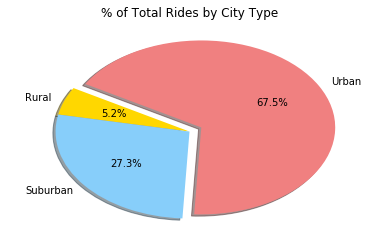

In [11]:
#Total Rides by City Type

merged_groupby_data=(merged_data.groupby(['type']))
x_axis=merged_groupby_data['ride_id'].count()
explode = (0,0,0.1 )
colors = ["Gold", "LightSkyBlue", 'LightCoral']
x_axis.plot(kind='pie',autopct="%1.1f%%", shadow=True,colors=colors, explode=explode, startangle=150)
plt.title("% of Total Rides by City Type")
plt.axis("off")

(-1.25, 1.25, -1.25, 1.25)

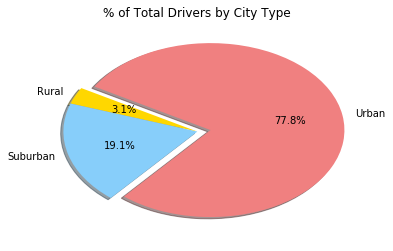

In [12]:
#Total Drivers by City Type

merged_groupby_data1=citydata_df.groupby(['type'])
x_axis=merged_groupby_data1['driver_count'].sum()
explode = (0,0,0.1 )
colors = ["Gold", "LightSkyBlue", 'LightCoral']
x_axis.plot(kind='pie',autopct="%1.1f%%", shadow=True,colors=colors, explode=explode, startangle=150)
plt.title("% of Total Drivers by City Type")
plt.axis("off")